In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each tableStation = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()



In [35]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
calculated = calc_temps('2017-08-01', '2018-08-01')

calculated

[(70.0, 78.82417582417582, 85.0)]

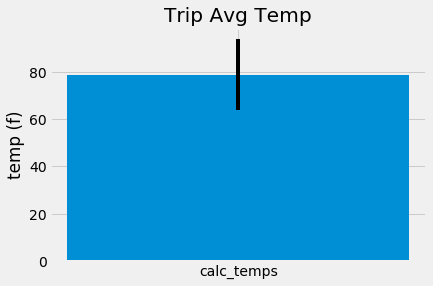

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
labels = "calc_temps"



mean = calculated[0][1]



fig, ax = plt.subplots()

ax.bar(labels, mean, yerr=((calculated[0][2])-(calculated[0][0])))
ax.set_ylabel('temp (f)')
ax.set_title('Trip Avg Temp')

plt.show()

# plt.bar(y=calculated[0][1], YERR = ((calculated[0][2])-(calculated[0][0])))



### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [45]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(67.0, 75.54, 83.0)]

In [97]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates

from datetime import date, timedelta

sdate = date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))   # start date
edate = date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))   # end date

delta = edate - sdate       # as timedelta

date_r = []

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    date_r.append(day)

# Strip off the year and save a list of strings in the format %m-%d
clean1 = [date_obj.strftime('%Y%m%d') for date_obj in date_r]
clean2 =[]
for x in range(7):
    clean2.append(clean1[x][-4:])
    
clean3 =[]

for y in range(7):
    clean3.append(str(clean2[y][0:2]+ "-" +clean2[y][2:5]))
    

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals= []
for clean in clean3:
    normals.append(daily_normals(clean))
        

In [116]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

df = pd.DataFrame(normals[0][0])

df

,0
0,67.00
1,75.54
2,83.00


In [106]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [46]:
start_date = '2017-08-01'
end_date = '2017-08-07'

In [64]:
int(start_date[0:4])
int(start_date[5:7])
int(start_date[8:10])

1